<a href="https://colab.research.google.com/github/rpdieego/Reinforcement_Learning/blob/master/Reinforcement_Learning_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aproximation Methods

#### Approximate Monte Carlo Method

In [0]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#grid world class

class Grid: # Environment
  def __init__ (self, rows, cols, start):
    self.rows = rows
    self.cols = cols
    self.i = start[0]
    self.j = start[1]

  def set(self, rewards, actions):
    # rewards is a dict of: (i,j): r
    # actions is a dict of: (i,j): A
    self.rewards = rewards
    self.actions = actions

  def set_state(self,s):
    #force state
    self.i = s[0]
    self.j = s[1]

  def current_state(self):
    #return the current state
    return (self.i, self.j)
  
  def is_terminal(self, s):
    #if state is not listed in the actions dictionary, it means it's a terminal state
    return s not in self.actions

  def get_next_state(self, s, a):
    i, j = s[0], s[1]
    if a in self.actions[(i,j)]:
      if a == 'U':
        i -= 1
      elif a =='D':
        i += 1
      elif a == 'R':
        j += 1
      elif a == 'L':
        j -= 1
    return i,j

  def move(self, action):
    # check if legal move first
    if action in self.actions[(self.i, self.j)]:
      if action == 'U':
        self.i -= 1
      elif action == 'D':
        self.i += 1
      elif action == 'R':
        self.j += 1
      elif action == 'L':
        self.j -= 1
    return self.rewards.get((self.i, self.j), 0)

  def undo_move(self, action):
    if action == 'U':
      self.i += 1
    elif action == 'D':
      self.i -= 1
    elif action == 'R':
      self.j -= 1
    elif action == 'L':
      self.j += 1
    #should never happen
    assert(self.current_state() in self.all_states())
  
  def game_over(self):
    #true if in a state where no actions are possible
    return (self.i,self.j) not in self.actions

  def all_states(self):
    #either a position that has possible next actions or a positions that yields a reward
    return set(self.actions.keys()) | set(self.rewards.keys())


In [0]:
# define grid environment

def standard_grid():
  g = Grid(3, 4, (2,0))
  rewards = {(0,3): 1, (1,3): -1}
  actions = {
      (0,0): ('D','R'),
      (0,1): ('L','R'),
      (0,2): ('L','D','R'),
      (1,0): ('U','D'),
      (1,2): ('U', 'D', 'R'),
      (2,0): ('U','R'),
      (2,1): ('L','R'),
      (2,2): ('L','R','U'),
      (2,3): ('L','U')
  }
  g.set(rewards, actions)
  return g

In [0]:
#define grid environment with step penalties

def negative_grid(step_cost=-0.1):
  # in this game we want to try to minimize the number of moves
  # so we will penalize every move
  g = standard_grid()
  g.rewards.update({
    (0, 0): step_cost,
    (0, 1): step_cost,
    (0, 2): step_cost,
    (1, 0): step_cost,
    (1, 2): step_cost,
    (2, 0): step_cost,
    (2, 1): step_cost,
    (2, 2): step_cost,
    (2, 3): step_cost,
  })
  return g

In [0]:
# auxiliar function to print values
def print_values(V,g):
  for i in range(g.rows):
    print('-------------------------------')
    for j in range(g.cols):
      v = V.get((i,j),0)
      if v>= 0:
        print(" %.2f|" % v, end="")
      else:
        print("%.2f|" % v, end="") # - sign take up an extra space
    print('')

In [0]:
# auxiliar function to print policy
def print_policy(P,g):
  print('Policy \n')
  for i in range(g.rows):
    print('-----------------------------')
    for j in range(g.cols):
      a = P.get((i,j),' ')
      print("  %s  |" % a, end='')
    print('')
  print('\n')

In [0]:
def play_game(grid, policy):

  #returns a list of states and corresponding returns

  #reset game to restart at random position
  #we need to do this, because given our current deterministic policy
  #we would never end up at certain states, but we still want to measure their value

  start_states = list(grid.actions.keys())
  start_idx = np.random.choice(len(start_states))
  grid.set_state(start_states[start_idx])

  s = grid.current_state()
  # list of tuples of (state, reward)
  states_and_rewards = [(s,0)]
  while not  grid.game_over():
    a = policy[s]
    r = grid.move(a)
    s = grid.current_state()
    states_and_rewards.append((s,r))

  #Calculate teh returns by working backwards from the terminal state
  G = 0
  states_and_returns = []
  first = True
  for s,r in reversed(states_and_rewards):
    # value of terminal state is 0 by definition
    #we should ignores the first state we encounter (terminal)
    # and ignore the last G, which is meaningless since it doesn't correspond to any move
    if first:
      first = False
    else:
      states_and_returns.append((s,G))
    
    G = r + gamma*G

  # we want it to be in order of state visited
  states_and_returns.reverse()

  return states_and_returns





In [0]:
def random_action(a):
  #choose given a with probability 0.5
  #choose some other a' != with probability 0.5/3
  p = np.random.random()
  if p < 0.5:
    return a
  else:
    tmp = list(ALL_POSSIBLE_ACTIONS)
    tmp.remove(a)
    return np.random.choice(tmp)

In [0]:
# definitions:

#convergence parameter
conv_parameter = 10e-4

# discount factor
gamma = 0.9

#learning rate
learning_rate = 0.001

Rewards:
-------------------------------
 0.00| 0.00| 0.00| 1.00|
-------------------------------
 0.00| 0.00| 0.00|-1.00|
-------------------------------
 0.00| 0.00| 0.00| 0.00|




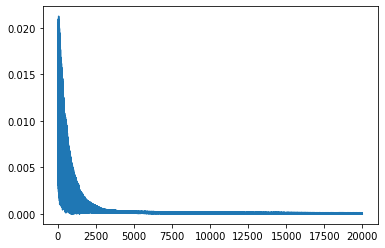

Final Values:
-------------------------------
 0.80| 0.90| 1.00| 0.00|
-------------------------------
 0.73| 0.00| 0.87| 0.00|
-------------------------------
 0.65| 0.70| 0.74| 0.79|


Final Policy
Policy 

-----------------------------
  R  |  R  |  R  |     |
-----------------------------
  U  |     |  U  |     |
-----------------------------
  U  |  L  |  U  |  L  |






In [21]:
#### main

#define grid environment
grid = standard_grid()

#print rewards
print('Rewards:')
print_values(grid.rewards, grid)
print('\n')

# state -> action

policy = {
    (2,0): 'U',
    (1,0): 'U',
    (0,0): 'R',
    (0,1): 'R',
    (0,2): 'R',
    (1,2): 'U',
    (2,1): 'L',
    (2,2): 'U',
    (2,3): 'L',
}

#initialize Theta
# our model is V_hat = theta.dot(x)
# where x = [row, col, row*col, 1] -> 1 for bias term
theta = np.random.randn(4) / 2

def s2x(s):
  return np.array([s[0] - 1, s[1] - 1.5, s[0]*s[1] - 3, 1])

# repeat until convergence
deltas = []
t = 1.0
for it in range(20000):

  # decreasing learning rate
  if it % 100 == 0:
    t += 0.01
  alpha = learning_rate / t

  # generate an episode using pi
  biggest_change = 0
  states_and_returns = play_game(grid, policy)
  seen_states = set()

  for s,G in states_and_returns:
    #check if we already seen s (first visit MC policy evaluation)
    if s not in seen_states:
      old_theta = theta.copy()
      x = s2x(s)
      V_hat = theta.dot(x)
      # grad (V_hat) wrt theta = x
      theta += alpha*(G - V_hat)*x
      biggest_change = max(biggest_change, np.abs(old_theta - theta).sum())
      seen_states.add(s)
  deltas.append(biggest_change)

plt.plot(deltas)
plt.show()

# obtain predicted values
V = {}
states = grid.all_states()
for s in states:
  if s in grid.actions:
    V[s] = theta.dot(s2x(s))
  else:
    #terminal state or state we cannot otherwise get to
    V[s] = 0

#print values
print('Final Values:')
print_values(V,grid)
print('\n')

#print policy
print('Final Policy')
print_policy(policy, grid)
print('\n')

#### TD (0) Semi-Gradient Prediction

In [0]:
def play_game(grid,policy):
  #return a list of states and corresponding rewards
  #start at the designated start state (2,0)
  s = (2,0)
  grid.set_state(s)
  #list of tuples of (state, reward)
  states_and_rewards = [(s,0)]
  while not grid.game_over():
    a = policy[s]
    a = random_action(a)
    r = grid.move(a)
    s = grid.current_state()
    states_and_rewards.append((s,r))
  return states_and_rewards

In [0]:
# definitions

#convergence parameter
conv_parameter = 10e-4

# discount factor
gamma = 0.9

# learning rate
alpha = 0.1

# Action Space
ALL_POSSIBLE_ACTIONS = ('U','D','L','R')

In [0]:
class Model:
  def __init__(self):
    self.theta = np.random.randn(4) /2

  # state to feature
  def s2x(self,s):
    return np.array([s[0] - 1, s[1] - 1.5, s[0]*s[1] - 3, 1])
  
  def predict(self, s):
    x = self.s2x(s)
    return self.theta.dot(x)
  
  def grad(self,s):
    return self.s2x(s)



Rewards :
-------------------------------
 0.00| 0.00| 0.00| 1.00|
-------------------------------
 0.00| 0.00| 0.00|-1.00|
-------------------------------
 0.00| 0.00| 0.00| 0.00|




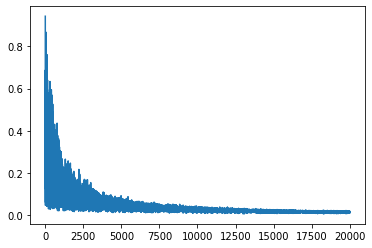

Final Values:
-------------------------------
 0.25| 0.35| 0.46| 0.00|
-------------------------------
 0.12| 0.00|-0.11| 0.00|
-------------------------------
-0.01|-0.35|-0.68|-1.02|


Final Policy
Policy 

-----------------------------
  R  |  R  |  R  |     |
-----------------------------
  U  |     |  R  |     |
-----------------------------
  U  |  R  |  R  |  U  |






In [35]:
### main section

#grid environment
grid = standard_grid()

# print rewards
print('Rewards :')
print_values(grid.rewards, grid)
print('\n')

# state -> action

policy = {
    (2,0): 'U',
    (1,0): 'U',
    (0,0): 'R',
    (0,1): 'R',
    (0,2): 'R',
    (1,2): 'R',
    (2,1): 'R',
    (2,2): 'R',
    (2,3): 'U',
}

# define model
model = Model()

#empty list to store deltas
deltas = []

# repeat until convergence
k = 1.0
for it in range(20000):
  
  # descending learning rate
  if it % 10 == 0:
    k += 0.01
  alpha_k = alpha/k
  biggest_change = 0

  # generate an episode using pi
  states_and_rewards = play_game(grid,policy)

  # first (s,r) tuple is a state we start in and 0 (no reward at start)
  # last (s,r) tuples is the terminal state and 0 (value is 0 by definition)

  for t in range(len(states_and_rewards) -1):
    s, _ = states_and_rewards[t]
    s2, r = states_and_rewards[t+1]

    # Update V(s) as we experience the episode

    old_theta = model.theta.copy()
    if grid.is_terminal(s2):
      target = r
    else:
      target = r + gamma*model.predict(s2)
    
    model.theta += alpha_k*(target - model.predict(s))*model.grad(s)
    biggest_change = max(biggest_change, np.abs(old_theta - model.theta).sum())

  deltas.append(biggest_change)

#plot deltas
plt.plot(deltas)
plt.show()

#obtain predicted values
V = {}
states = grid.all_states()
for s in states:
  if s in grid.actions:
    V[s] = model.predict(s)
  else:
    #terminal state
    V[s] = 0


#print values
print('Final Values:')
print_values(V,grid)
print('\n')

#print policy
print('Final Policy')
print_policy(policy, grid)
print('\n')





#### Semi Gradient SARSA

In [0]:
def max_dict(d):
  # returns the argmax (key) and max (value) from a dictionary
  # put this into a function since we are using it so often
  max_key = None
  max_val = float('-inf')
  for k, v in d.items():
    if v > max_val:
      max_val = v
      max_key = k
  return max_key, max_val

In [0]:
def random_action(a, eps=0.1):
  #we'll use episilon-soft to ensure all states are visited
  p = np.random.random()
  if p < (1-eps):
    return a
  else:
    return np.random.choice(ALL_POSSIBLE_ACTIONS)

In [0]:
SA2IDX = {}
IDX = 0

In [0]:
class Model:
  def __init__(self):
    self.theta = np.random.randn(25) / np.sqrt(25)
    # if we use SA2IDX, a one-hot encoding for every (s,a) pair
    # in reality we wouldn't want to do this b/c we have just
    # as many params as before
    # print "D:", IDX
    # self.theta = np.random.randn(IDX) / np.sqrt(IDX)

  def sa2x(self, s, a):
    # NOTE: using just (r, c, r*c, u, d, l, r, 1) is not expressive enough
    return np.array([
      s[0] - 1              if a == 'U' else 0,
      s[1] - 1.5            if a == 'U' else 0,
      (s[0]*s[1] - 3)/3     if a == 'U' else 0,
      (s[0]*s[0] - 2)/2     if a == 'U' else 0,
      (s[1]*s[1] - 4.5)/4.5 if a == 'U' else 0,
      1                     if a == 'U' else 0,
      s[0] - 1              if a == 'D' else 0,
      s[1] - 1.5            if a == 'D' else 0,
      (s[0]*s[1] - 3)/3     if a == 'D' else 0,
      (s[0]*s[0] - 2)/2     if a == 'D' else 0,
      (s[1]*s[1] - 4.5)/4.5 if a == 'D' else 0,
      1                     if a == 'D' else 0,
      s[0] - 1              if a == 'L' else 0,
      s[1] - 1.5            if a == 'L' else 0,
      (s[0]*s[1] - 3)/3     if a == 'L' else 0,
      (s[0]*s[0] - 2)/2     if a == 'L' else 0,
      (s[1]*s[1] - 4.5)/4.5 if a == 'L' else 0,
      1                     if a == 'L' else 0,
      s[0] - 1              if a == 'R' else 0,
      s[1] - 1.5            if a == 'R' else 0,
      (s[0]*s[1] - 3)/3     if a == 'R' else 0,
      (s[0]*s[0] - 2)/2     if a == 'R' else 0,
      (s[1]*s[1] - 4.5)/4.5 if a == 'R' else 0,
      1                     if a == 'R' else 0,
      1
    ])
    # if we use SA2IDX, a one-hot encoding for every (s,a) pair
    # in reality we wouldn't want to do this b/c we have just
    # as many params as before
    # x = np.zeros(len(self.theta))
    # idx = SA2IDX[s][a]
    # x[idx] = 1
    # return x

  def predict(self, s, a):
    x = self.sa2x(s, a)
    return self.theta.dot(x)

  def grad(self, s, a):
    return self.sa2x(s, a)


def getQs(model, s):
  # we need Q(s,a) to choose an action
  # i.e. a = argmax[a]{ Q(s,a) }
  Qs = {}
  for a in ALL_POSSIBLE_ACTIONS:
    q_sa = model.predict(s, a)
    Qs[a] = q_sa
  return Qs

rewards:
-------------------------------
-0.10|-0.10|-0.10| 1.00|
-------------------------------
-0.10| 0.00|-0.10|-1.00|
-------------------------------
-0.10|-0.10|-0.10|-0.10|
it: 0
it: 1000
it: 2000
it: 3000
it: 4000
it: 5000
it: 6000
it: 7000
it: 8000
it: 9000
it: 10000
it: 11000
it: 12000
it: 13000
it: 14000
it: 15000
it: 16000
it: 17000
it: 18000
it: 19000


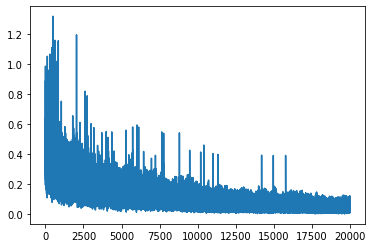

values:
-------------------------------
 0.47| 0.69| 0.96| 0.00|
-------------------------------
 0.35| 0.00| 0.50| 0.00|
-------------------------------
 0.21| 0.00| 0.07| 0.43|
policy:
Policy 

-----------------------------
  R  |  R  |  R  |     |
-----------------------------
  U  |     |  U  |     |
-----------------------------
  U  |  L  |  U  |  U  |




In [45]:
if __name__ == '__main__':
  # NOTE: if we use the standard grid, there's a good chance we will end up with
  # suboptimal policies
  # e.g.
  # ---------------------------
  #   R  |   R  |   R  |      |
  # ---------------------------
  #   R* |      |   U  |      |
  # ---------------------------
  #   U  |   R  |   U  |   L  |
  # since going R at (1,0) (shown with a *) incurs no cost, it's OK to keep doing that.
  # we'll either end up staying in the same spot, or back to the start (2,0), at which
  # point we whould then just go back up, or at (0,0), at which point we can continue
  # on right.
  # instead, let's penalize each movement so the agent will find a shorter route.
  #
  # grid = standard_grid()
  grid = negative_grid(step_cost=-0.1)

  # print rewards
  print("rewards:")
  print_values(grid.rewards, grid)

  # no policy initialization, we will derive our policy from most recent Q
  # enumerate all (s,a) pairs, each will have its own weight in our "dumb" model
  # essentially each weight will be a measure of Q(s,a) itself
  states = grid.all_states()
  for s in states:
    SA2IDX[s] = {}
    for a in ALL_POSSIBLE_ACTIONS:
      SA2IDX[s][a] = IDX
      IDX += 1

  # initialize model
  model = Model()

  # repeat until convergence
  t = 1.0
  t2 = 1.0
  deltas = []
  for it in range(20000):
    if it % 100 == 0:
      t += 0.01
      t2 += 0.01
    if it % 1000 == 0:
      print("it:", it)
    alpha_t = alpha / t2

    # instead of 'generating' an epsiode, we will PLAY
    # an episode within this loop
    s = (2, 0) # start state
    grid.set_state(s)

    # get Q(s) so we can choose the first action
    Qs = getQs(model, s)

    # the first (s, r) tuple is the state we start in and 0
    # (since we don't get a reward) for simply starting the game
    # the last (s, r) tuple is the terminal state and the final reward
    # the value for the terminal state is by definition 0, so we don't
    # care about updating it.
    a = max_dict(Qs)[0]
    a = random_action(a, eps=0.5/t) # epsilon-greedy
    biggest_change = 0
    while not grid.game_over():
      r = grid.move(a)
      s2 = grid.current_state()

      # we need the next action as well since Q(s,a) depends on Q(s',a')
      # if s2 not in policy then it's a terminal state, all Q are 0
      old_theta = model.theta.copy()
      if grid.is_terminal(s2):
        model.theta += alpha_t*(r - model.predict(s, a))*model.grad(s, a)
      else:
        # not terminal
        Qs2 = getQs(model, s2)
        a2 = max_dict(Qs2)[0]
        a2 = random_action(a2, eps=0.5/t) # epsilon-greedy

        # we will update Q(s,a) AS we experience the episode
        model.theta += alpha_t*(r + gamma*model.predict(s2, a2) - model.predict(s, a))*model.grad(s, a)
        
        # next state becomes current state
        s = s2
        a = a2

      biggest_change = max(biggest_change, np.abs(model.theta - old_theta).sum())
    deltas.append(biggest_change)

  plt.plot(deltas)
  plt.show()

  # determine the policy from Q*
  # find V* from Q*
  policy = {}
  V = {}
  Q = {}
  for s in grid.actions.keys():
    Qs = getQs(model, s)
    Q[s] = Qs
    a, max_q = max_dict(Qs)
    policy[s] = a
    V[s] = max_q

  print("values:")
  print_values(V, grid)
  print("policy:")
  print_policy(policy, grid)